<a href="https://colab.research.google.com/github/faqiharjiyo/Komputasi-Statistika/blob/main/24_542607_PA_23039_Faqih_Arjiyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Komputasi Statistika 2


## Input Dataset

#### Install Library

In [2]:
!pip install opendatasets

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from scipy.stats import norm


# Download dataset dari Kaggle
od.download("https://www.kaggle.com/datasets/mcdonalds/nutrition-facts")

# Load file yang benar
data = pd.read_csv('/content/nutrition-facts/menu.csv')

data.head()


Skipping, found downloaded files in "./nutrition-facts" (use force=True to force download)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


#### Cek Kolom

In [25]:
print(data.columns)

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


#### Cek Missing Values

In [26]:
data.isnull().sum()

,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


#### Cek Duplikat Data

In [27]:
data.duplicated().sum()

np.int64(0)

#### Cek Unik data

In [28]:
data['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [33]:
data['Serving Size'].unique()

array(['4.8 oz (136 g)', '4.8 oz (135 g)', '3.9 oz (111 g)',
       '5.7 oz (161 g)', '6.5 oz (185 g)', '5.3 oz (150 g)',
       '5.8 oz (164 g)', '5.4 oz (153 g)', '5.9 oz (167 g)',
       '4.1 oz (117 g)', '4.6 oz (131 g)', '5.7 oz (163 g)',
       '6.2 oz (177 g)', '6.4 oz (181 g)', '5 oz (143 g)',
       '5.5 oz (157 g)', '7.1 oz (201 g)', '6.1 oz (174 g)',
       '6.3 oz (178 g)', '5 oz (141 g)', '7.2 oz (205 g)',
       '6.9 oz (197 g)', '8.5 oz (241 g)', '9.5 oz (269 g)',
       '10 oz (283 g)', '9.6 oz (272 g)', '10.1 oz (286 g)',
       '14.8 oz (420 g)', '15.3 oz (434 g)', '14.9 oz (423 g)',
       '15.4 oz (437 g)', '5.3 oz (151 g)', '6.8 oz (192 g)',
       '2 oz (56 g)', '4 oz (114 g)', '9.6 oz (251 g)', '7.4 oz (211 g)',
       '7.1 oz (202 g)', '8 oz (227 g)', '8.3 oz (235 g)',
       '8.6 oz (244 g)', '3.5 oz (98 g)', '4 oz (113 g)',
       '9.5 oz (270 g)', '5.2 oz (147 g)', '6.7 oz (190 g)',
       '5.6 oz (159 g)', '7.3 oz (208 g)', '7.5 oz (213 g)',
       '7 oz (20

Dapat Dilihat dari Serving Size tersebut bahwa penggunaan size setiap penyajian berbeda-beda seperti Ml, Fl oz, dan Gram. Akan dipilih Gram untuk Penyajian selain Coffee and tea dan Fl Oz untuk penyajian coffee and tea.

### Nomor 1

#### Cek Masing-Masing Tipe Data

In [30]:
print(df.dtypes)

Category                          object
Item                              object
Serving Size                     float64
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object


In [70]:
import numpy as np
import pandas as pd

df = data.copy()

df['gram'] = df['Serving Size'].str.extract(r'\((\d+)\s*g\)', expand=False)

df['floz'] = df['Serving Size'].str.extract(r'(\d+\.?\d*)\s*fl\s*oz', expand=False)

df['ml_carton'] = np.where(
    df['Serving Size'].str.contains('carton', case=False, na=False),
    df['Serving Size'].str.extract(r'\((\d+)\s*ml\)', expand=False),
    np.nan
)

df['carton_to_floz'] = pd.to_numeric(df['ml_carton'], errors='coerce') / 29.5735

df['Serving Size'] = np.where(
    df['floz'].notna(),
    df['floz'],
    np.where(
        df['carton_to_floz'].notna(),
        df['carton_to_floz'],
        df['gram']
    )
)

df['Serving Size'] = pd.to_numeric(df['Serving Size'], errors='coerce')

df.drop(columns=['gram','floz','ml_carton','carton_to_floz'], inplace=True)

df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


##### Cek Unique Serving Size

In [46]:
df['Serving Size'].unique()

array([136.        , 135.        , 111.        , 161.        ,
       185.        , 150.        , 164.        , 153.        ,
       167.        , 117.        , 131.        , 163.        ,
       177.        , 181.        , 143.        , 157.        ,
       201.        , 174.        , 178.        , 141.        ,
       205.        , 197.        , 241.        , 269.        ,
       283.        , 272.        , 286.        , 420.        ,
       434.        , 423.        , 437.        , 151.        ,
       192.        ,  56.        , 114.        , 251.        ,
       211.        , 202.        , 227.        , 235.        ,
       244.        ,  98.        , 113.        , 270.        ,
       147.        , 190.        , 159.        , 208.        ,
       213.        , 200.        , 249.        , 230.        ,
       217.        , 284.        , 160.        , 171.        ,
       148.        , 316.        , 302.        , 310.        ,
       297.        , 314.        , 318.        , 304.  

Dapat dilihat bahwa Format pada Serving Size sudah konsisten dimana Coffee &  Tea menggunakan Fl Oz dan Selain variabel tersebut menggunakan Gram.

##### a. Mean, Median, Modus

In [60]:
hasil_A = pd.DataFrame({
    'mean': df[kolom].mean(),
    'median': df[kolom].median(),
    'mode': df[kolom].mode().iloc[0]
})

print(hasil_A)

                    mean  median  mode
Serving Size  102.311001    25.5  16.0
Calories      368.269231   340.0   0.0
Total Fat      14.165385    11.0   0.0


##### b. Range, Q1, Q3, IQR

In [64]:
Hasil_B = pd.DataFrame({
    'range': df[kolom].max() - df[kolom].min(),
    'Q1': df[kolom].quantile(0.25),
    'Q3': df[kolom].quantile(0.75),
    'IQR': df[kolom].quantile(0.75) - df[kolom].quantile(0.25)
})

print(Hasil_B)

               range       Q1      Q3      IQR
Serving Size   640.0   16.000  174.75  158.750
Calories      1880.0  210.000  500.00  290.000
Total Fat      118.0    2.375   22.25   19.875


##### c. Standar Deviasi dan Variance

In [63]:
Hasil_C = pd.DataFrame({
    'standar deviasi': df[kolom].std(),
    'variansi': df[kolom].var()
})

print(Hasil_C)

              standar deviasi      variansi
Serving Size       114.999049  13224.781232
Calories           240.269886  57729.618355
Total Fat           14.205998    201.810380


### Nomor 2


#### Cari data Outlier Menggunakan IQR Method

In [65]:
hasil_outlier = pd.DataFrame(columns=['Kolom','Batas Bawah','Batas Atas','Jumlah Outlier'])

for col in kolom:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    jumlah = len(df[(df[col] < lower) | (df[col] > upper)])

    hasil_outlier.loc[len(hasil_outlier)] = [col, lower, upper, jumlah]

print(hasil_outlier)


          Kolom  Batas Bawah  Batas Atas  Jumlah Outlier
0  Serving Size    -222.1250    412.8750               6
1      Calories    -225.0000    935.0000               6
2     Total Fat     -27.4375     52.0625               4


### Nomor 3

#### tampilkan sebaran data dalam bentuk boxplot dan histogram untuk feature/column Serving Size, Calories, & Total Fat.

#### Pilih Kategori

In [71]:
data['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [75]:
kategori_pilih = [
    'Coffee & Tea',
    'Breakfast',
    'Chicken & Fish',
    'Beef & Pork',
    'Snacks & Sides'
]

df_filtered = df[df['Category'].isin(kategori_pilih)]

df_filtered.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,136.0,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,135.0,250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,111.0,370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,161.0,450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,161.0,400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


#### Cek Unique dan Melihat data bagian akhir

In [80]:
df_filtered['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Snacks & Sides',
       'Coffee & Tea'], dtype=object)

In [81]:
df_filtered['Serving Size'].unique()

array([136., 135., 111., 161., 185., 150., 164., 153., 167., 117., 131.,
       163., 177., 181., 143., 157., 201., 174., 178., 141., 205., 197.,
       241., 269., 283., 272., 286., 420., 434., 423., 437., 151., 192.,
        56., 114., 251., 211., 202., 227., 235., 244.,  98., 113., 270.,
       147., 190., 159., 208., 213., 200., 249., 230., 217., 284., 160.,
       171., 148., 316., 302., 310., 297., 314., 318., 304., 291.,  65.,
        97., 162., 323., 646., 142., 130., 123., 116., 128., 121.,  75.,
       168.,  38.,  87.,  34., 149.,  16.,  21.,  30.,  12.,  20.,  22.,
        32.])

In [92]:
df_filtered.tail()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
227,Coffee & Tea,Frappé Caramel (Medium),16.0,550,200,23.0,35,15.0,73,1.0,...,79,26,0,0,71,9,20,0,30,2
228,Coffee & Tea,Frappé Caramel (Large),22.0,670,250,27.0,42,17.0,87,1.5,...,96,32,0,0,88,11,20,0,35,2
229,Coffee & Tea,Frappé Chocolate Chip (Small),12.0,530,200,23.0,35,14.0,72,1.0,...,76,25,1,5,67,8,15,0,25,4
230,Coffee & Tea,Frappé Chocolate Chip (Medium),16.0,630,240,26.0,41,17.0,85,1.0,...,91,30,1,5,81,9,15,0,30,4
231,Coffee & Tea,Frappé Chocolate Chip (Large),22.0,760,280,31.0,48,20.0,101,1.5,...,111,37,1,5,99,12,20,0,35,6


##### a. Boxplot

In [95]:
print(df_filtered[['Serving Size','Calories','Total Fat']].dtypes)

Serving Size    float64
Calories          int64
Total Fat       float64
dtype: object


<Figure size 640x480 with 0 Axes>

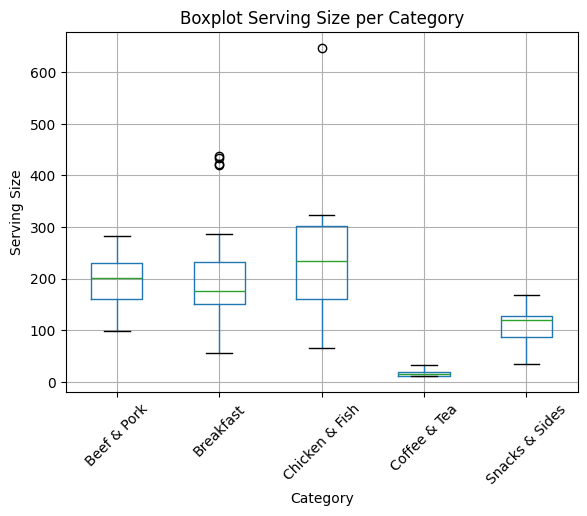

<Figure size 640x480 with 0 Axes>

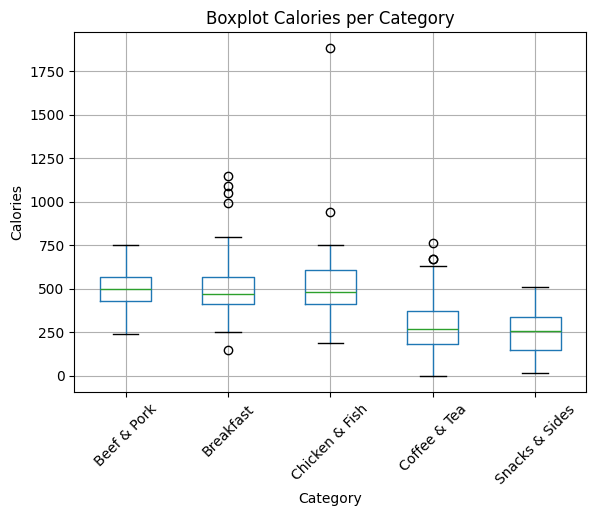

<Figure size 640x480 with 0 Axes>

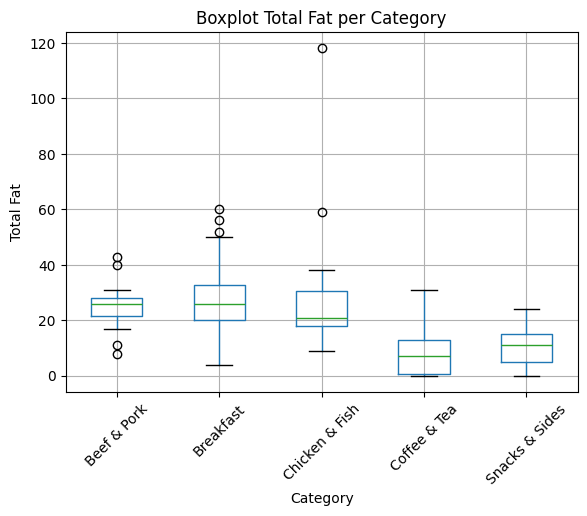

In [96]:
for col in kolom:
    plt.figure()
    df_filtered.boxplot(column=col, by='Category')
    plt.title(f'Boxplot {col} per Category')
    plt.suptitle('')
    plt.xlabel('Category')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

Dari Boxplot tersebut dapat disimpulkan :

1. Terlihat bahwa pada Serving Size, Kategori Breakfast memiliki outlier,
2. pada Calories, kategori Breakfast, Chicken & Fish, dan Coffee & Tea memiliki outlier
3. Pada Total Fat, Kategori Beef & Pork, Breakfast, dan Chicken & Fish memiliki Outlier



##### b. Histogram

###### Histogram Keseluruhan

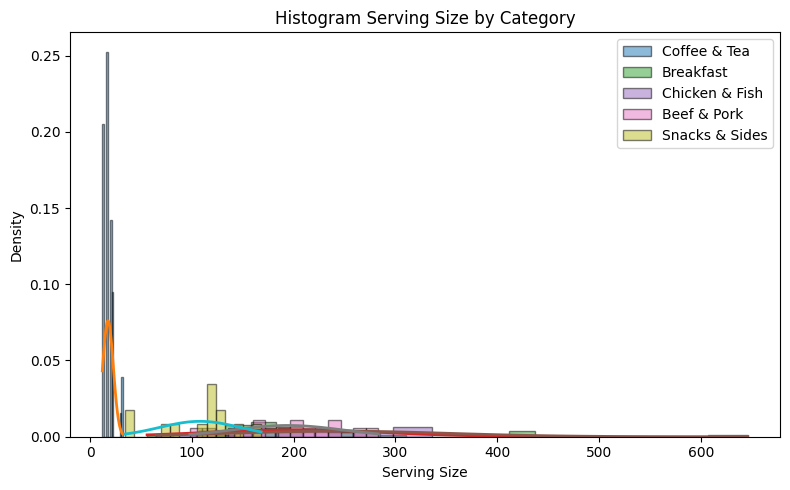

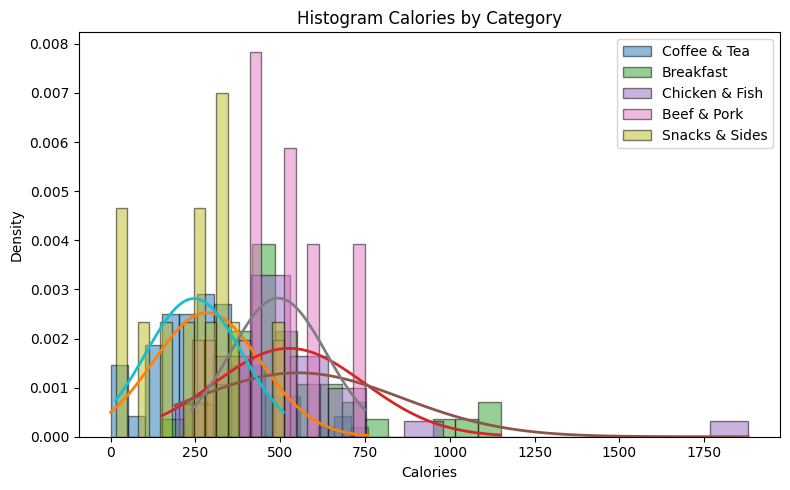

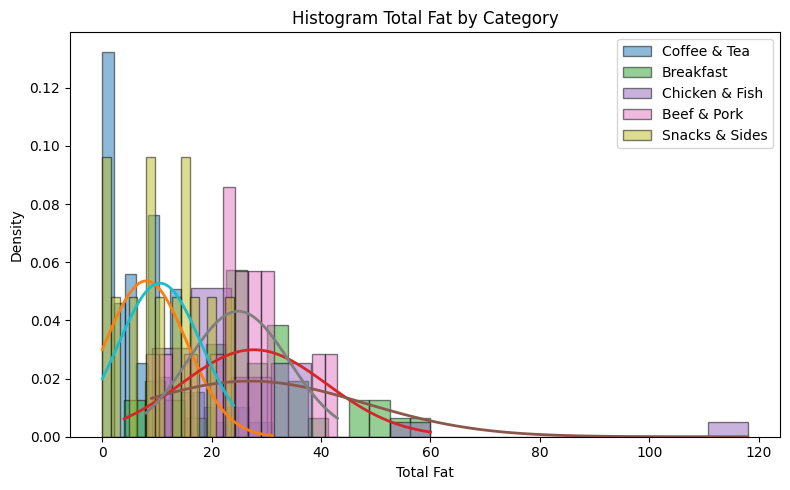

In [100]:
for col in features:
    plt.figure(figsize=(8,5))

    for kategori in kategori_pilih:
        subset = df_filtered[df_filtered['Category'] == kategori]
        values = subset[col].dropna()

        if len(values) > 1:
            count, bins, ignored = plt.hist(
                values,
                bins=15,
                alpha=0.5,
                label=kategori,
                edgecolor='black',
                density=True
            )

            mu, std = values.mean(), values.std()

            x = np.linspace(bins[0], bins[-1], 100)
            p = norm.pdf(x, mu, std)

            plt.plot(x, p, linewidth=2)

    plt.title(f'Histogram {col} by Category')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


####### Histogram Satu-Satu

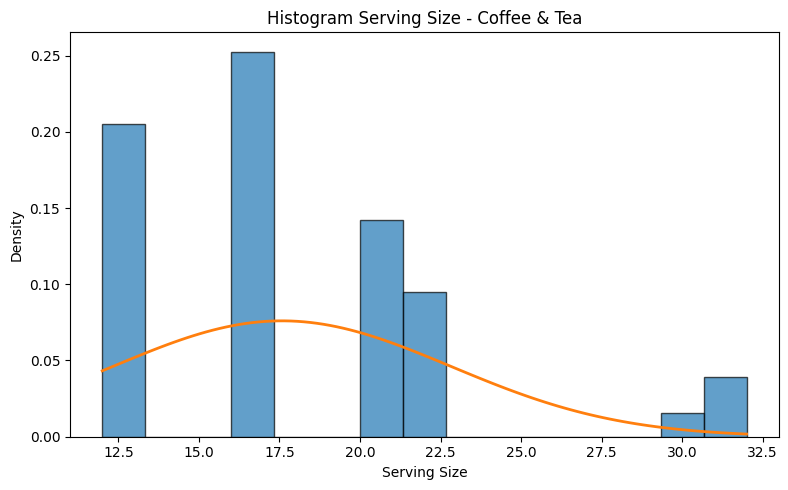

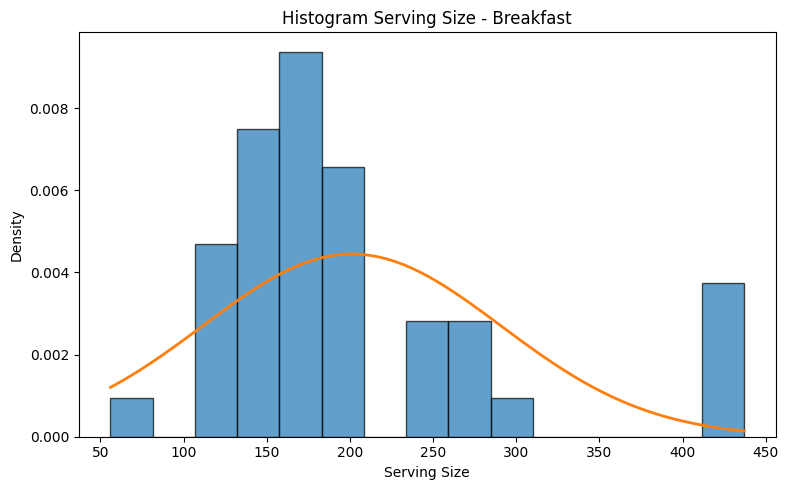

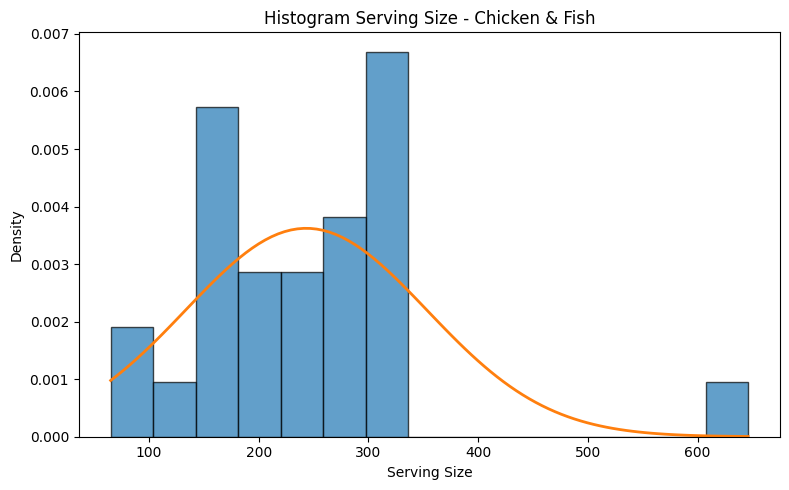

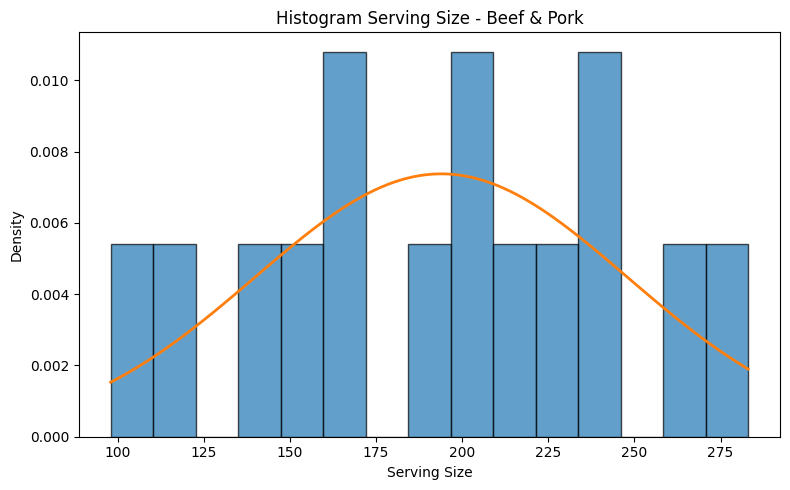

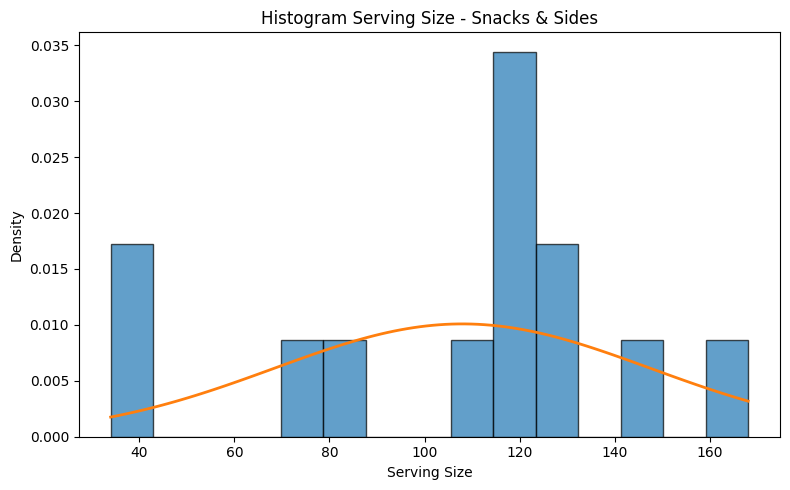

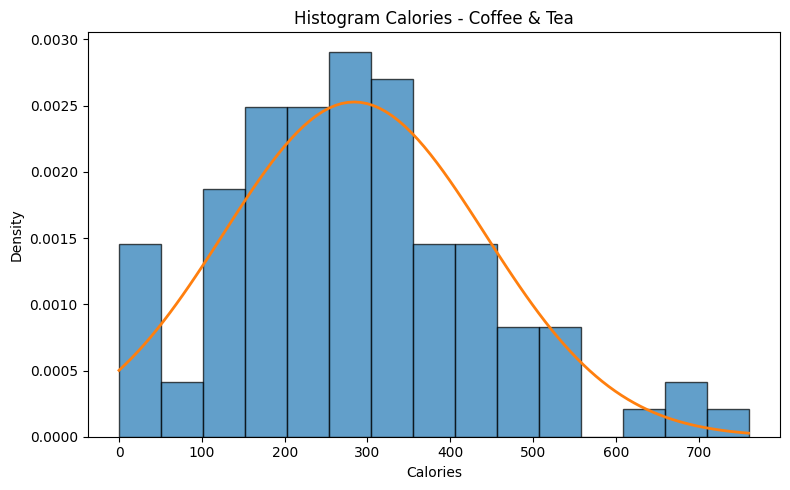

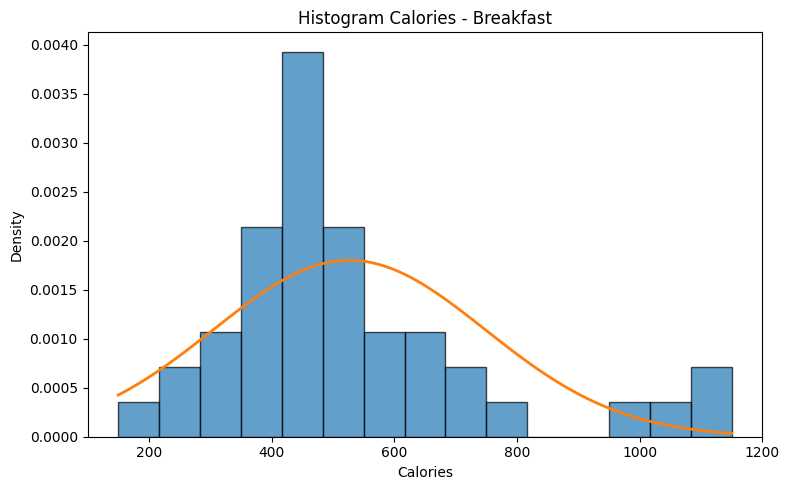

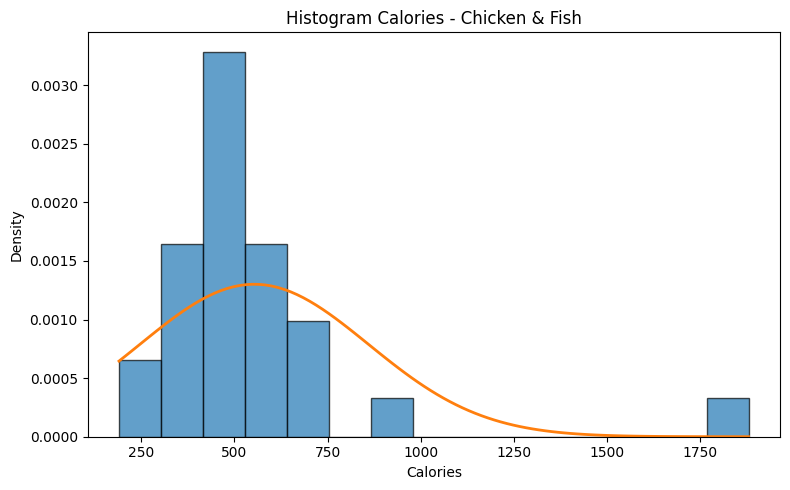

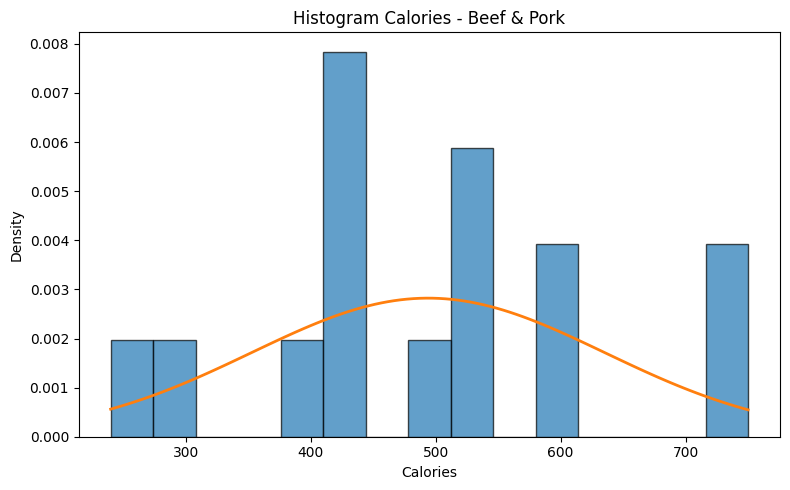

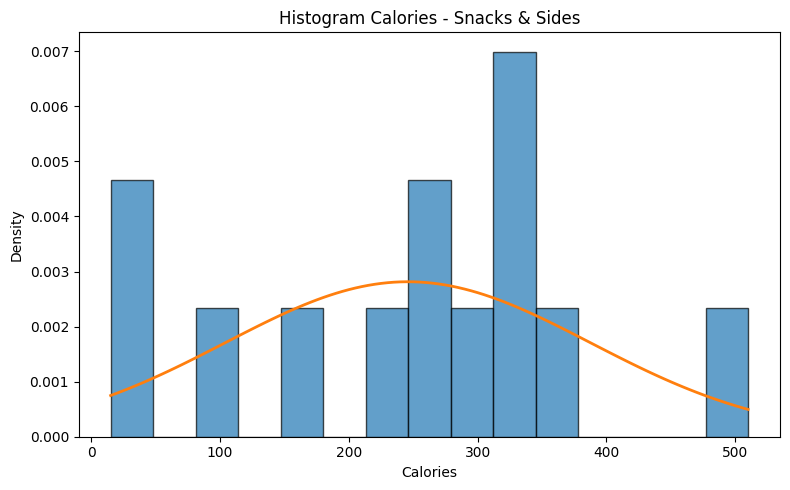

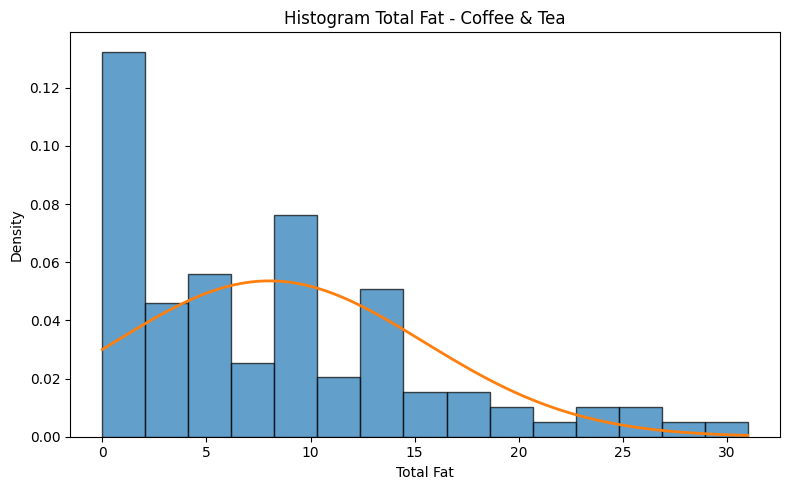

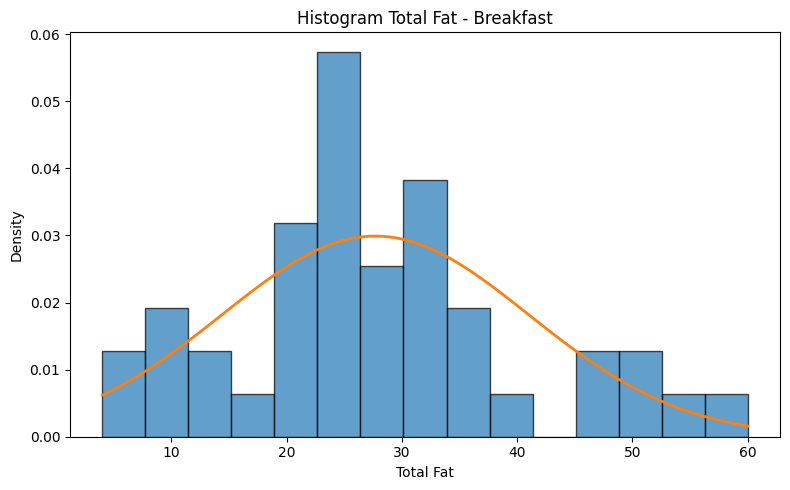

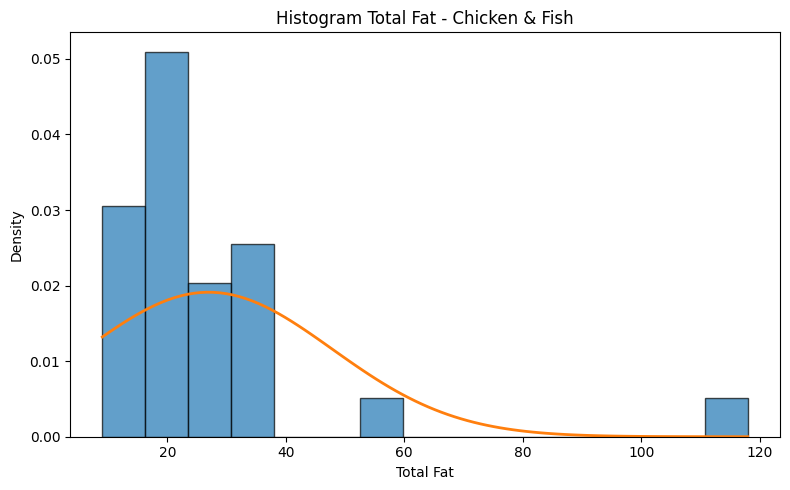

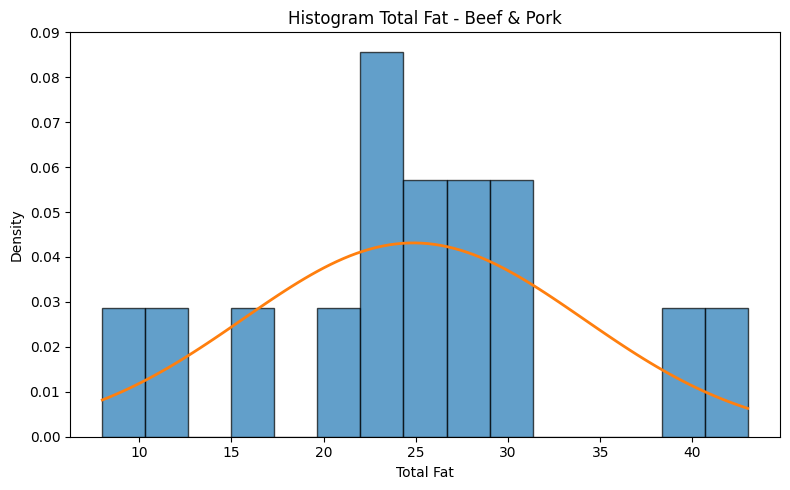

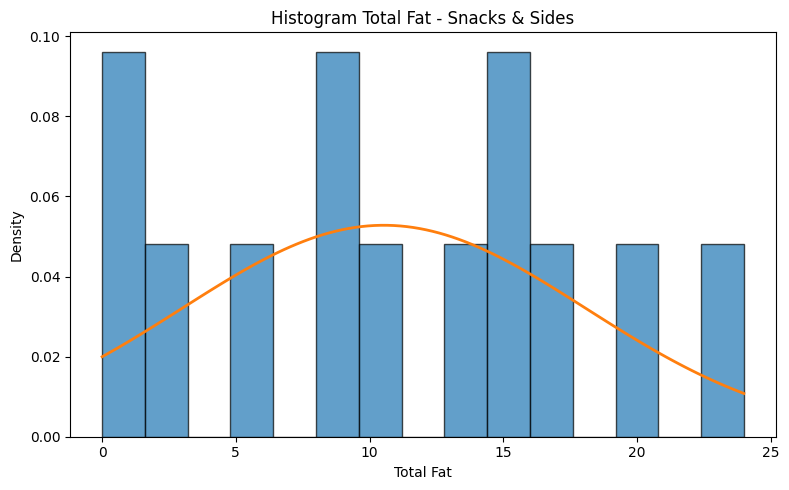

In [101]:
for col in features:
    for kategori in kategori_pilih:

        subset = df_filtered[df_filtered['Category'] == kategori]
        values = subset[col].dropna()

        if len(values) > 1:
            plt.figure(figsize=(8,5))

            # Histogram dengan border
            count, bins, ignored = plt.hist(
                values,
                bins=15,
                alpha=0.7,
                edgecolor='black',
                density=True
            )

            # Mean & Std
            mu, std = values.mean(), values.std()

            # Garis normal
            x = np.linspace(bins[0], bins[-1], 100)
            p = norm.pdf(x, mu, std)
            plt.plot(x, p, linewidth=2)

            plt.title(f'Histogram {col} - {kategori}')
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.tight_layout()
            plt.show()

### Nomor 4

#### Top 5 Serving Size

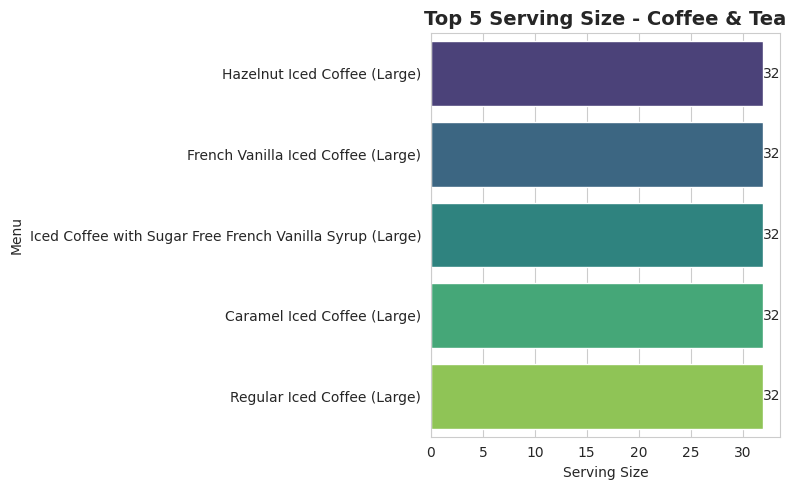

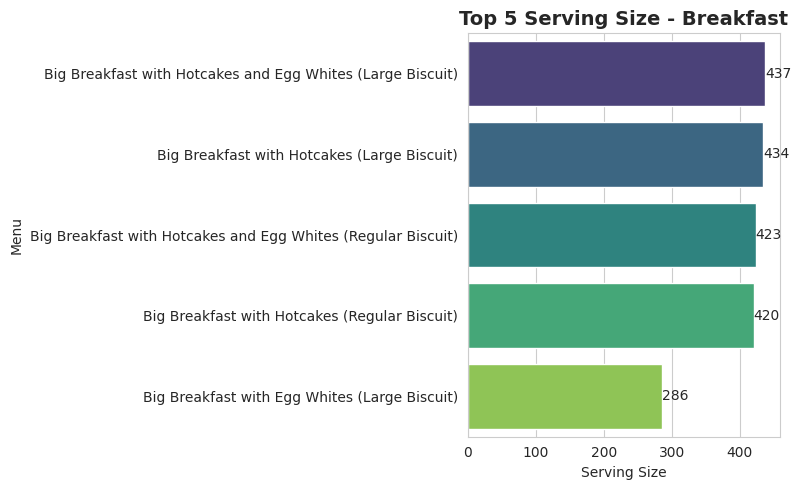

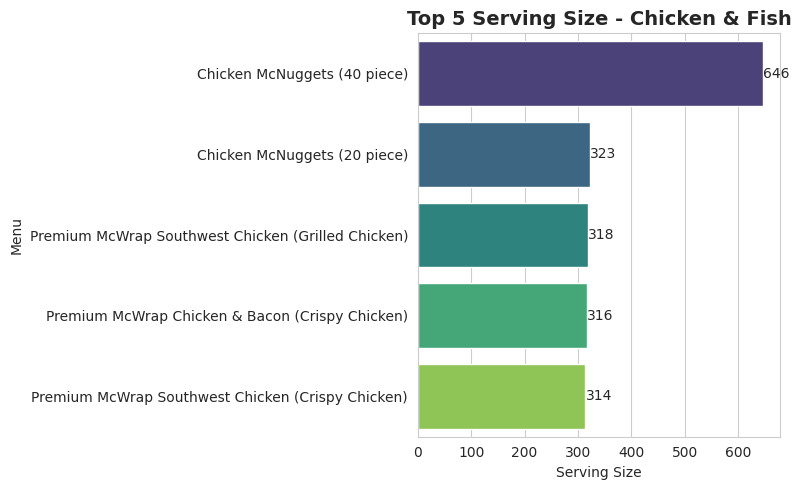

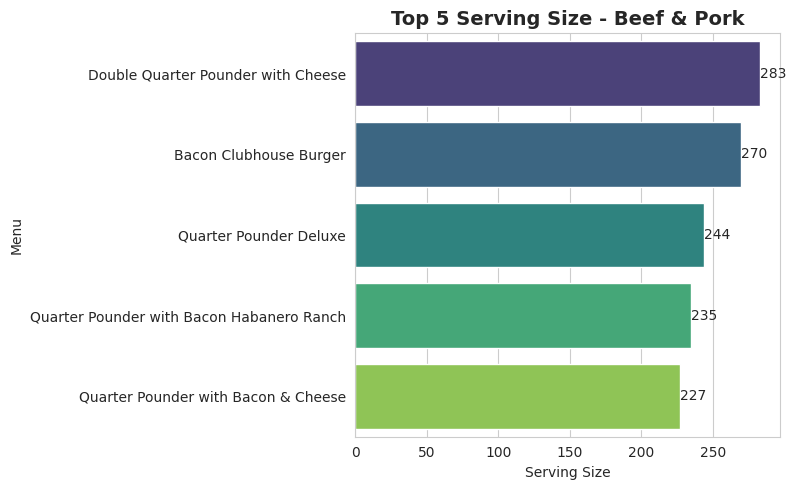

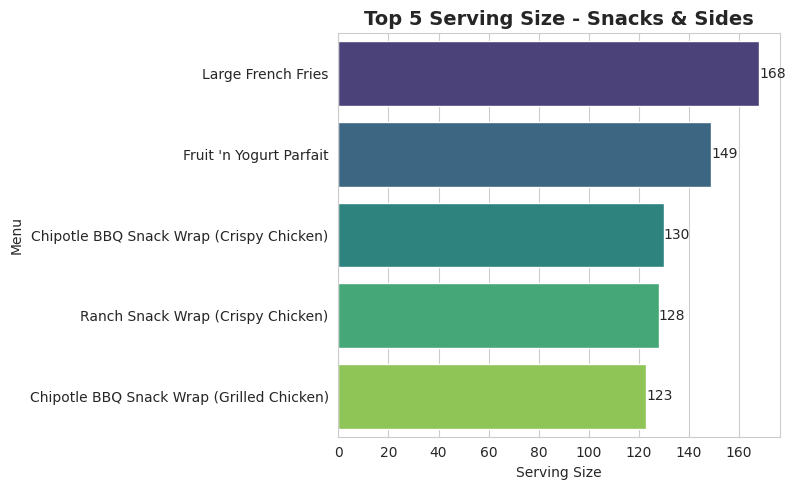

In [112]:
sns.set_style("whitegrid")

for kategori in kategori_pilih:

    df_kategori = df_filtered[df_filtered['Category'] == kategori].copy()
    df_kategori = df_kategori.dropna(subset=['Serving Size'])

    top5 = df_kategori.sort_values(
        by='Serving Size',
        ascending=False
    ).head(5)

    if len(top5) > 0:

        plt.figure(figsize=(8,5))

        ax = sns.barplot(
            data=top5,
            x='Serving Size',
            y='Item',
            hue='Item',
            palette='viridis',
            legend=False
        )

        # Tambahkan label angka di ujung bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f')

        plt.title(f'Top 5 Serving Size - {kategori}',
                  fontsize=14, fontweight='bold')
        plt.xlabel('Serving Size')
        plt.ylabel('Menu')
        plt.tight_layout()
        plt.show()

##### Dalam Satu Plot :

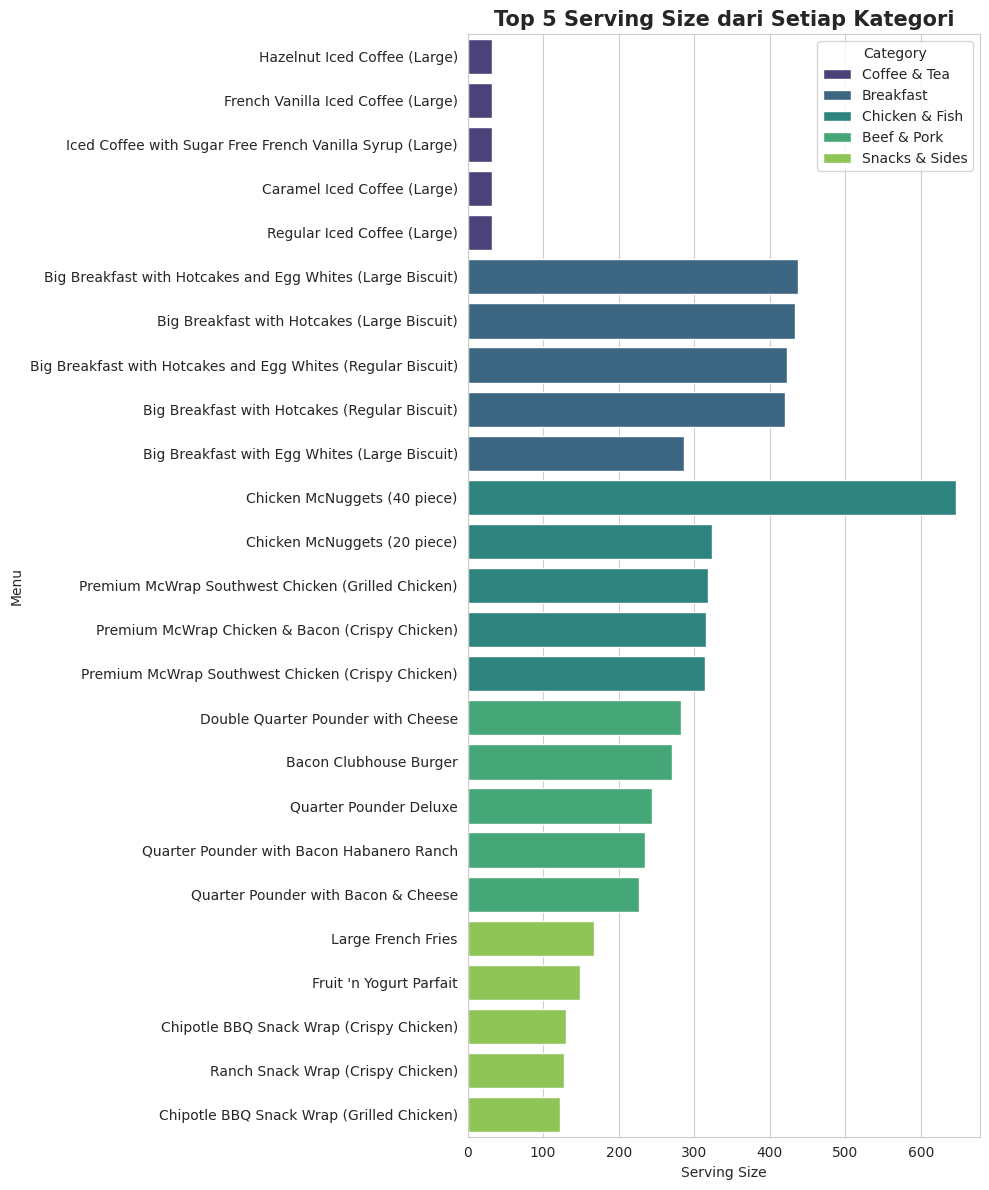

In [113]:
sns.set_style("whitegrid")

top5_all = pd.DataFrame()

for kategori in kategori_pilih:
    df_kategori = df_filtered[df_filtered['Category'] == kategori].copy()
    df_kategori = df_kategori.dropna(subset=['Serving Size'])

    top5 = df_kategori.sort_values(
        by='Serving Size',
        ascending=False
    ).head(5)

    top5_all = pd.concat([top5_all, top5])

# Plot dalam 1 grafik
plt.figure(figsize=(10,12))

ax = sns.barplot(
    data=top5_all,
    x='Serving Size',
    y='Item',
    hue='Category',
    palette='viridis'
)

plt.title('Top 5 Serving Size dari Setiap Kategori',
          fontsize=15, fontweight='bold')
plt.xlabel('Serving Size')
plt.ylabel('Menu')
plt.tight_layout()
plt.show()

#### Top 5 Calories Tertinggi Setiap Kategori

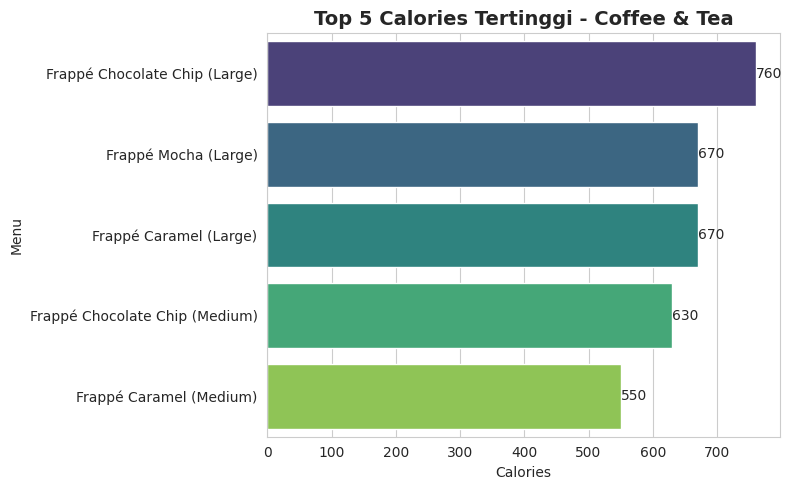

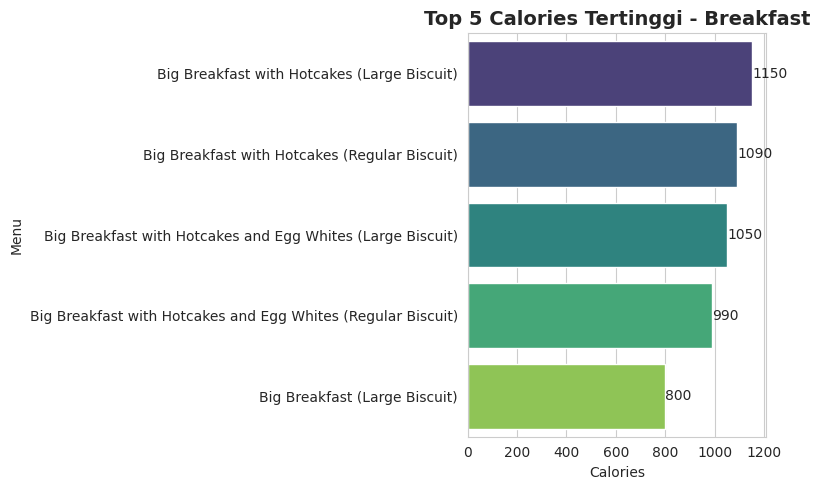

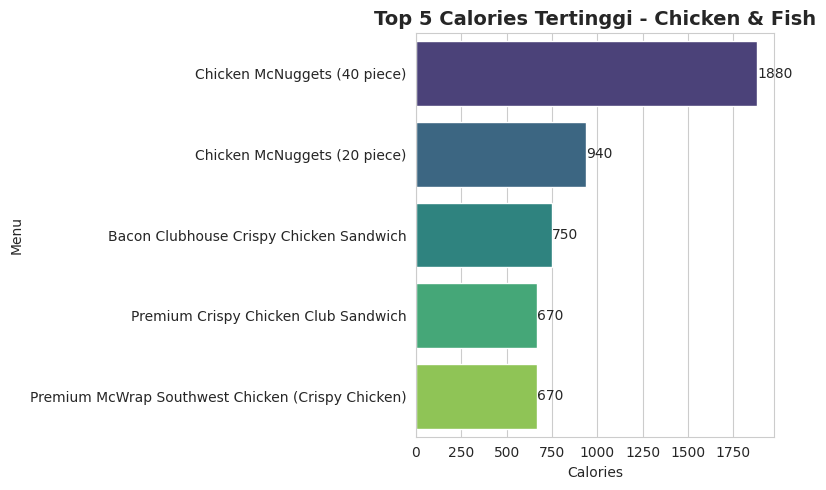

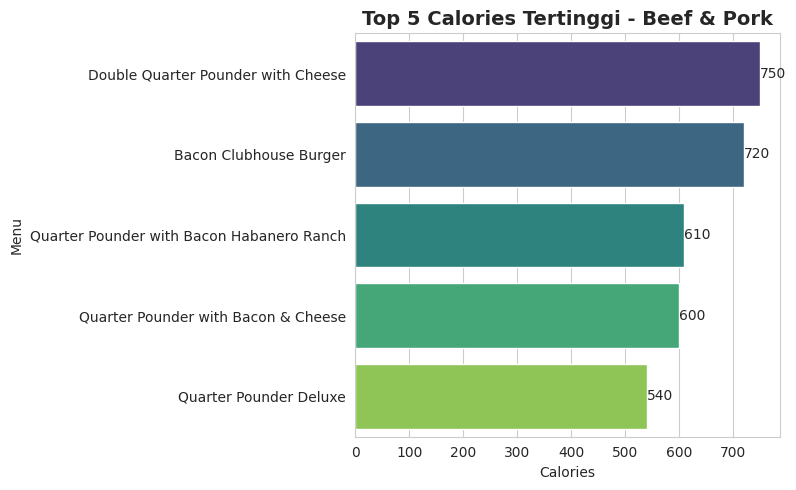

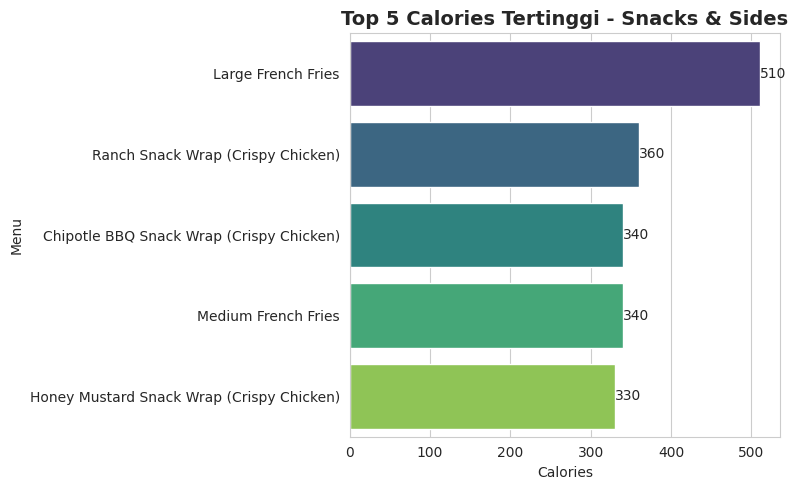

In [108]:
sns.set_style("whitegrid")

for kategori in kategori_pilih:

    df_kategori = df_filtered[df_filtered['Category'] == kategori].copy()
    df_kategori = df_kategori.dropna(subset=['Calories'])

    top5 = df_kategori.sort_values(
        by='Calories',
        ascending=False
    ).head(5)

    if len(top5) > 0:

        plt.figure(figsize=(8,5))

        ax = sns.barplot(
            data=top5,
            x='Calories',
            y='Item',
            hue='Item',
            palette='viridis',
            legend=False
        )

        # Tambahkan label angka
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f')

        plt.title(f'Top 5 Calories Tertinggi - {kategori}',
                  fontsize=14, fontweight='bold')
        plt.xlabel('Calories')
        plt.ylabel('Menu')
        plt.tight_layout()
        plt.show()

#####Dalam satu Plot:

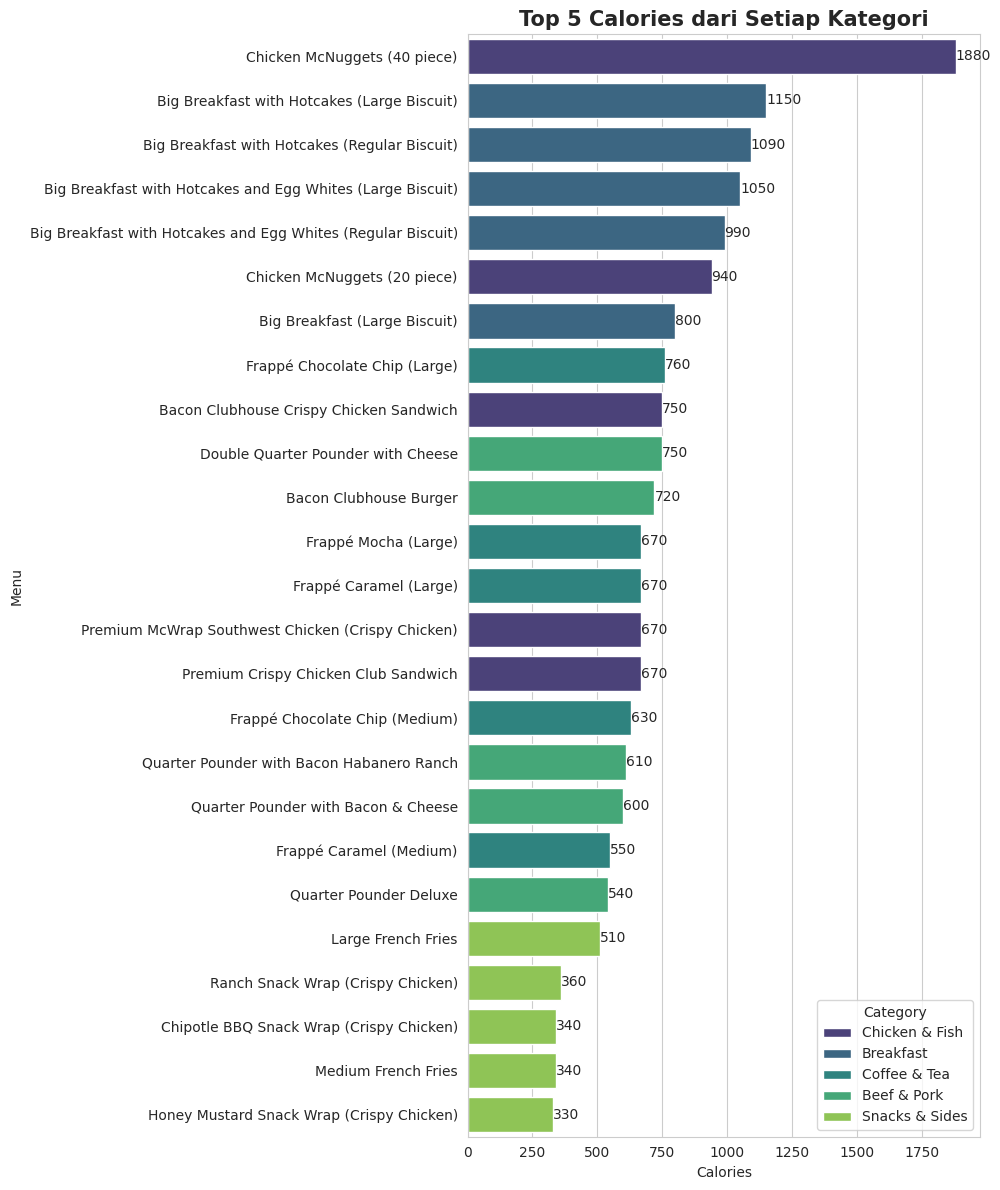

In [114]:
sns.set_style("whitegrid")

# Kumpulkan semua Top 5 Calories dari tiap kategori
top5_all = pd.DataFrame()

for kategori in kategori_pilih:
    df_kategori = df_filtered[df_filtered['Category'] == kategori].copy()
    df_kategori = df_kategori.dropna(subset=['Calories'])

    top5 = df_kategori.sort_values(
        by='Calories',
        ascending=False
    ).head(5)

    top5_all = pd.concat([top5_all, top5])

# Urutkan global dari terbesar ke kecil
top5_all = top5_all.sort_values(by='Calories', ascending=False)

# Plot
plt.figure(figsize=(10,12))

ax = sns.barplot(
    data=top5_all,
    x='Calories',
    y='Item',
    hue='Category',
    palette='viridis'
)

# Tambahkan label angka
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title('Top 5 Calories dari Setiap Kategori',
          fontsize=15, fontweight='bold')
plt.xlabel('Calories')
plt.ylabel('Menu')
plt.tight_layout()
plt.show()

#### Top 5 Menu dengan Total Fat tertinggi tiap kategori.

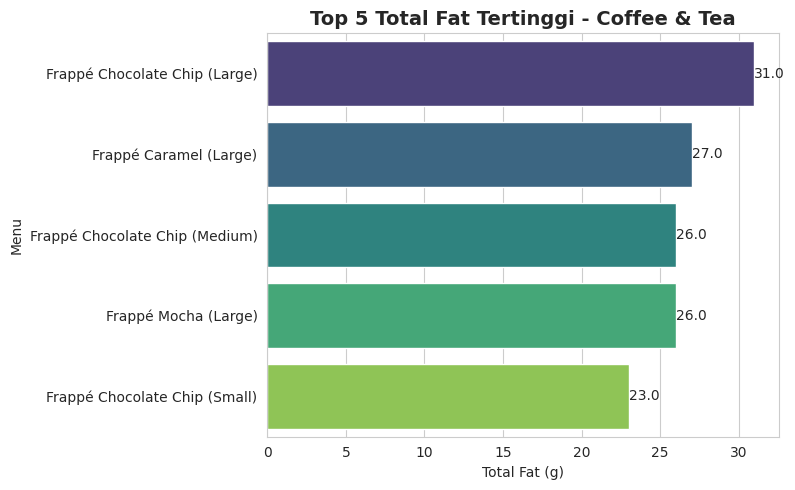

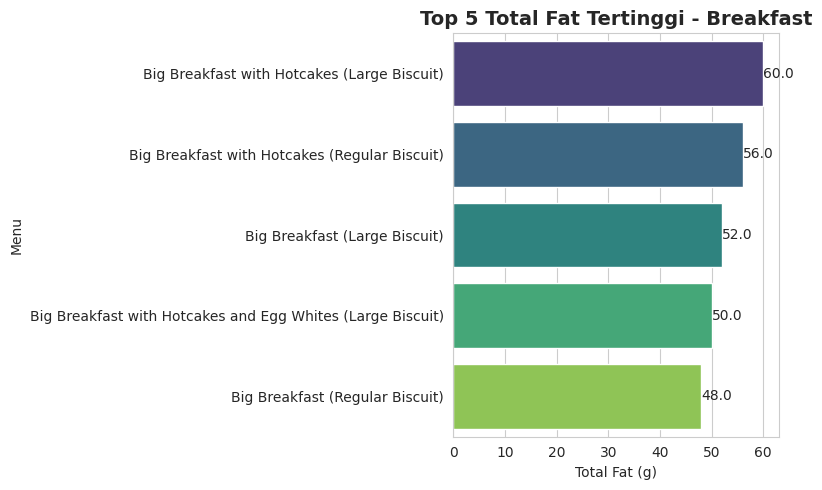

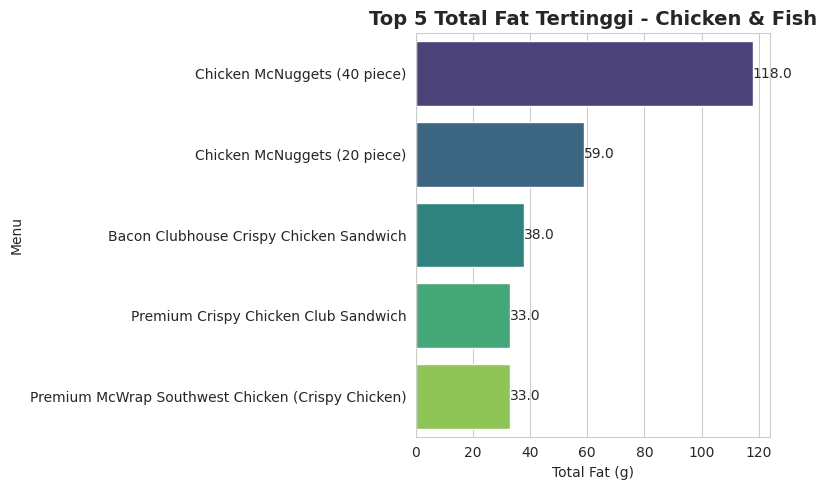

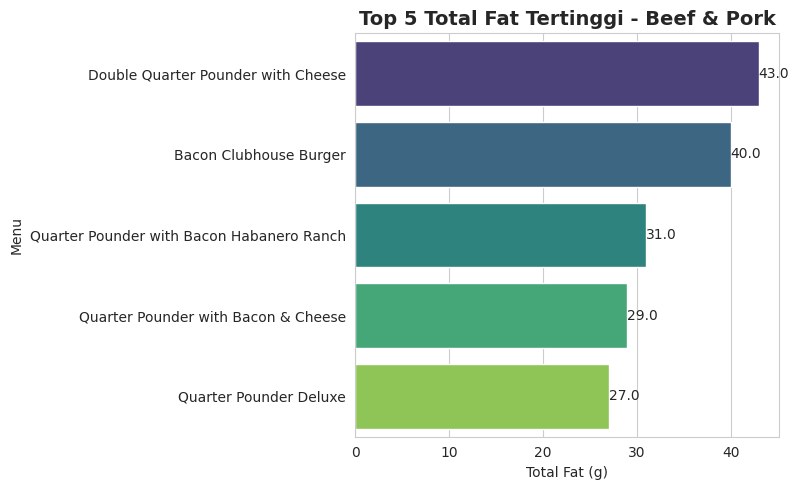

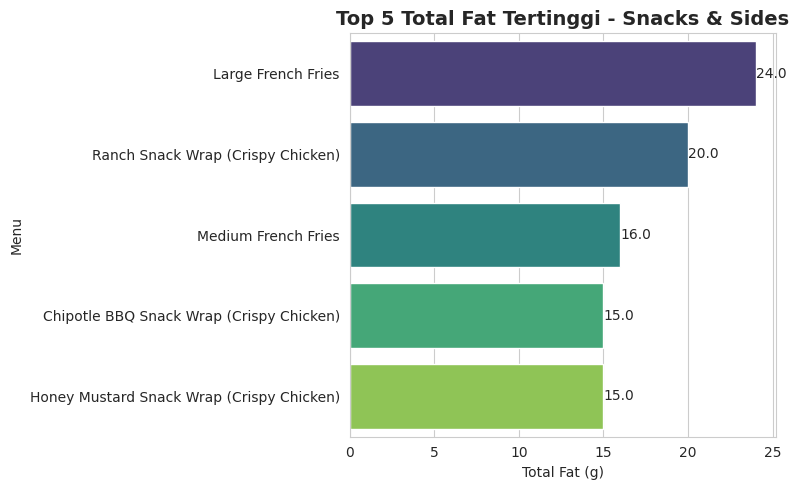

In [110]:
sns.set_style("whitegrid")

for kategori in kategori_pilih:

    df_kategori = df_filtered[df_filtered['Category'] == kategori].copy()
    df_kategori = df_kategori.dropna(subset=['Total Fat'])

    top5 = df_kategori.sort_values(
        by='Total Fat',
        ascending=False
    ).head(5)

    if len(top5) > 0:

        plt.figure(figsize=(8,5))

        ax = sns.barplot(
            data=top5,
            x='Total Fat',
            y='Item',
            hue='Item',          # agar tidak warning seaborn
            palette='viridis',
            legend=False
        )

        # Tambahkan label angka di ujung bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f')

        plt.title(f'Top 5 Total Fat Tertinggi - {kategori}',
                  fontsize=14, fontweight='bold')
        plt.xlabel('Total Fat (g)')
        plt.ylabel('Menu')
        plt.tight_layout()
        plt.show()

##### Dalam satu plot :

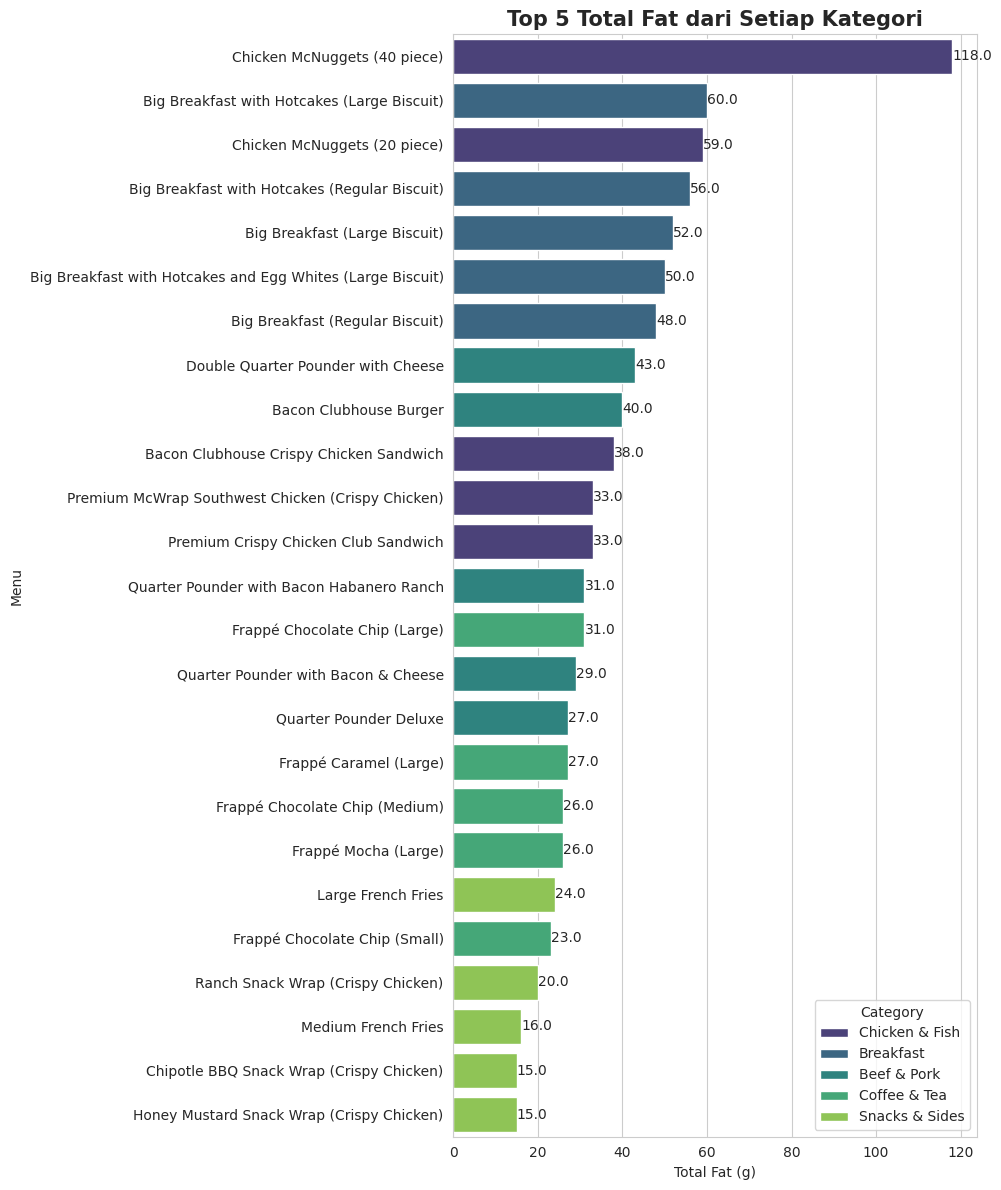

In [115]:
sns.set_style("whitegrid")

# Kumpulkan Top 5 Total Fat dari tiap kategori
top5_all = pd.DataFrame()

for kategori in kategori_pilih:
    df_kategori = df_filtered[df_filtered['Category'] == kategori].copy()
    df_kategori = df_kategori.dropna(subset=['Total Fat'])

    top5 = df_kategori.sort_values(
        by='Total Fat',
        ascending=False
    ).head(5)

    top5_all = pd.concat([top5_all, top5])

# Urutkan global dari terbesar
top5_all = top5_all.sort_values(by='Total Fat', ascending=False)

# Plot dalam satu grafik
plt.figure(figsize=(10,12))

ax = sns.barplot(
    data=top5_all,
    x='Total Fat',
    y='Item',
    hue='Category',
    palette='viridis'
)

# Tambahkan label angka
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.title('Top 5 Total Fat dari Setiap Kategori',
          fontsize=15, fontweight='bold')
plt.xlabel('Total Fat (g)')
plt.ylabel('Menu')
plt.tight_layout()
plt.show()